In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
import glob
from functools import  reduce

# TODO: Load all insights to a single dataframe.
path = "../data/periodic_data"
all_files = glob.glob(path + "/*.csv")

csvs = []
for f in all_files:
    csvs.append(pd.read_csv(f))
    
online_followers_idx = 1
online_followers = csvs.pop(online_followers_idx)

data = reduce(lambda x,y: pd.merge(x,y, on='date', how='outer'), [df for df in csvs])
data = data.set_index('date')

data

,profile_views,total_follower_count,impressions,reach,get_direction_clicks,follower_count,phone_call_clicks,website_clicks,email_contacts,text_message_clicks
date,,,,,,,,,,
2019-11-01,91,NaN,442,236,0,8,0,9,0,0
2019-11-02,44,NaN,516,291,0,5,0,0,0,0
2019-11-03,132,NaN,653,299,0,18,0,3,0,0
2019-11-04,184,NaN,446,171,0,25,0,0,0,0
2019-11-05,119,NaN,208,66,0,20,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-08-02,152,6035.0,2002,1229,0,34,0,2,0,0
2020-08-03,271,6075.0,5438,3240,0,53,0,1,0,0
2020-08-04,242,6103.0,5620,1569,0,34,0,1,1,0


## Daily follower count analysis

### Daily follower count historic values

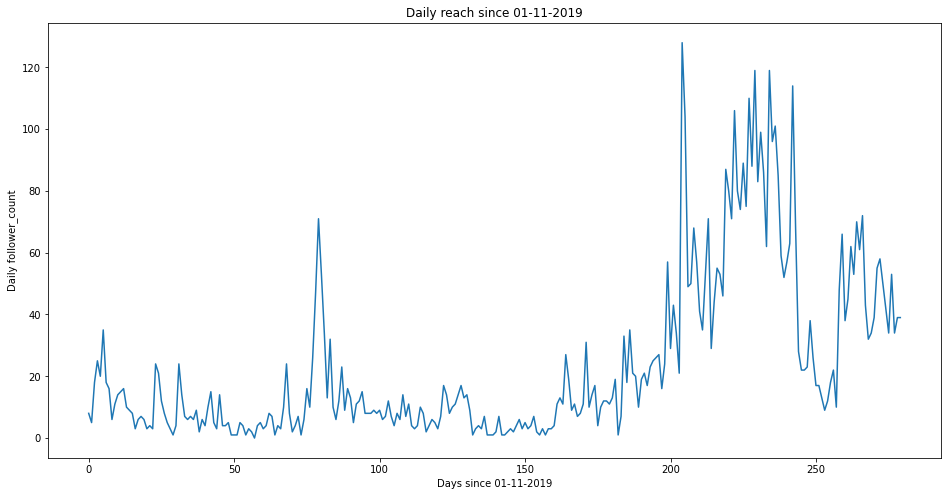

In [98]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.set_xlabel('Days since 01-11-2019')
ax.set_ylabel('Daily follower_count')
ax.set_title('Daily reach since 01-11-2019')
ax.plot([i for i in range(len(data.index))], data['follower_count'])

### Daily reach and daily new followers

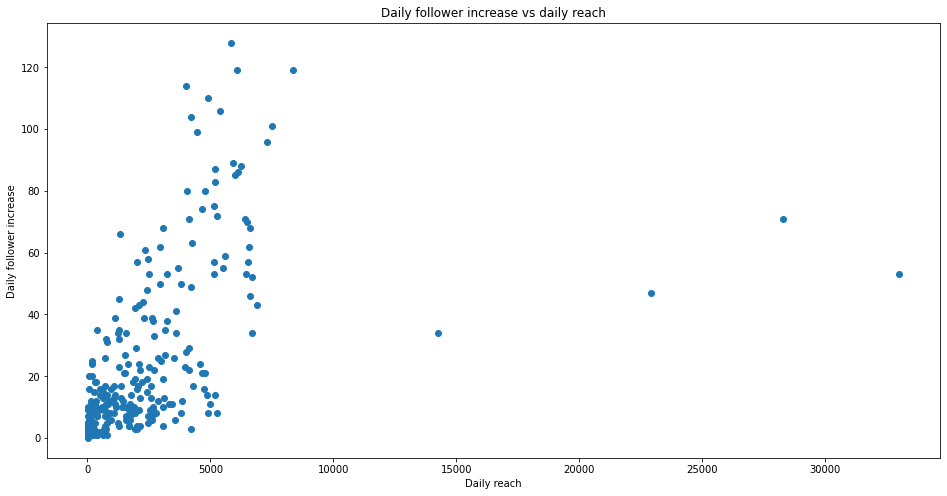

In [90]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.set_xlabel('Daily reach')
ax.set_ylabel('Daily follower increase')
ax.set_title('Daily follower increase vs daily reach')
ax.scatter(data['reach'], data['follower_count'])

### Daily follower and reach without (apparent) outliers

#### Linear fit

Residual sum of squares (RSS): 90148.38144001926
Total sum of squares (TSS): 200246.3007246377
R squared: 0.549812500336853


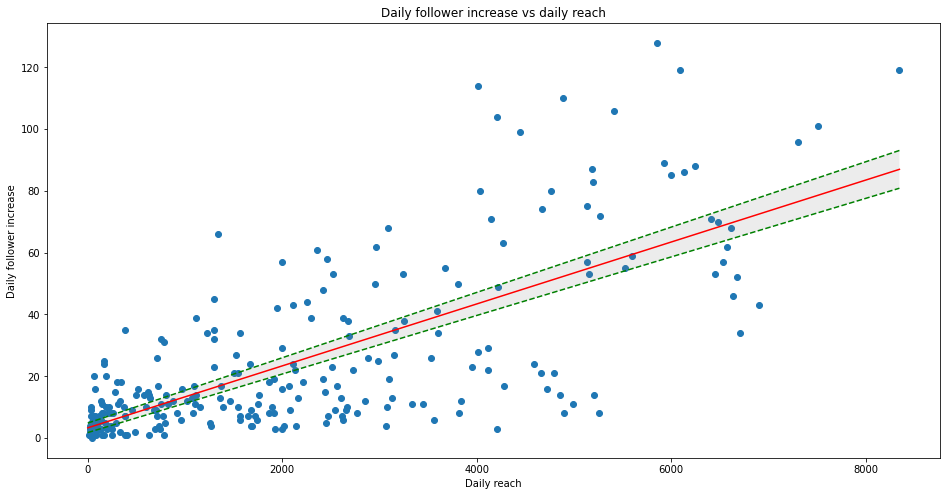

In [94]:
data_notl_reach = data.loc[data['reach'] < 10000]

fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.set_xlabel('Daily reach')
ax.set_ylabel('Daily follower increase')
ax.set_title('Daily follower increase vs daily reach')
ax.scatter(data_notl_reach['reach'], data_notl_reach['follower_count'])

import scipy.optimize as optimization

def func(x, a, b):
    return a*x + b

# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = np.array(data_notl_reach['reach'])
ydata = np.array(data_notl_reach['follower_count'])
# Initial guess.
x0    = np.array([0.0, 0.0])

popt, pcov = optimization.curve_fit(func, xdata, ydata, x0)
perr = np.sqrt(np.diag(pcov))
max_val = data_notl_reach['reach'].max()
x_vals = np.arange(0, max_val, 0.1)

fit = []
fit_plus = []
fit_minus = []
for x in x_vals:
    fit.append(func(x, popt[0], popt[1]))
    fit_minus.append(func(x, popt[0] - perr[0], popt[1] - perr[1]))
    fit_plus.append(func(x, popt[0] + perr[0], popt[1] + perr[1]))
    
ax.plot(x_vals, fit, color = 'r');
ax.plot(x_vals, fit_plus, color = 'g', linestyle = '--');
ax.plot(x_vals, fit_minus, color = 'g', linestyle = '--');
ax.fill_between(x_vals, fit_minus, fit_plus, facecolor = 'gray', alpha = 0.15);

residuals = ydata - func(xdata, *popt)
ss_res = np.sum(residuals**2)
print("Residual sum of squares (RSS): " + str(ss_res))
ss_tot = np.sum((ydata - np.mean(ydata))**2)
print("Total sum of squares (TSS): " + str(ss_tot))
r_squared = 1 - (ss_res / ss_tot)
print("R squared: " + str(r_squared))

#### Quadratic fit

Residual sum of squares (RSS): 88114.29143665251
Total sum of squares (TSS): 200246.3007246377
R squared: 0.559970440813186


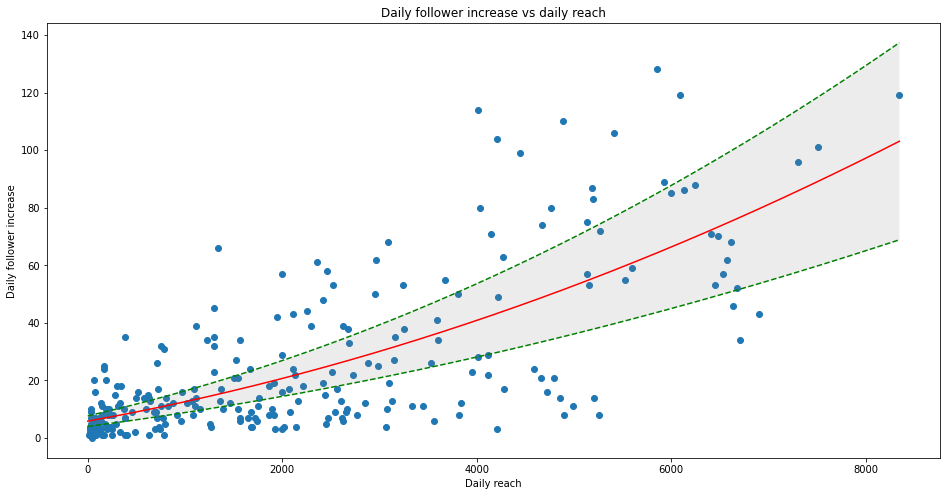

In [95]:
data_notl_reach = data.loc[data['reach'] < 10000]

fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.set_xlabel('Daily reach')
ax.set_ylabel('Daily follower increase')
ax.set_title('Daily follower increase vs daily reach')
ax.scatter(data_notl_reach['reach'], data_notl_reach['follower_count'])

import scipy.optimize as optimization

def func(x, a, b, c):
    return a*x**2 + b*x + c

# Generate artificial data = straight line with a=0 and b=1
# plus some noise.
xdata = np.array(data_notl_reach['reach'])
ydata = np.array(data_notl_reach['follower_count'])
# Initial guess.
x0    = np.array([0.0, 0.0, 0.0])

popt, pcov = optimization.curve_fit(func, xdata, ydata, x0)
perr = np.sqrt(np.diag(pcov))
max_val = data_notl_reach['reach'].max()
x_vals = np.arange(0, max_val, 0.1)

fit = []
fit_plus = []
fit_minus = []
for x in x_vals:
    fit.append(func(x, popt[0], popt[1], popt[2]))
    fit_minus.append(func(x, popt[0] - perr[0], popt[1] - perr[1], popt[2] - perr[2]))
    fit_plus.append(func(x, popt[0] + perr[0], popt[1] + perr[1], popt[2] + perr[2]))
    
ax.plot(x_vals, fit, color = 'r');
ax.plot(x_vals, fit_plus, color = 'g', linestyle = '--');
ax.plot(x_vals, fit_minus, color = 'g', linestyle = '--');
ax.fill_between(x_vals, fit_minus, fit_plus, facecolor = 'gray', alpha = 0.15);

residuals = ydata - func(xdata, *popt)
ss_res = np.sum(residuals**2)
print("Residual sum of squares (RSS): " + str(ss_res))
ss_tot = np.sum((ydata - np.mean(ydata))**2)
print("Total sum of squares (TSS): " + str(ss_tot))
r_squared = 1 - (ss_res / ss_tot)
print("R squared: " + str(r_squared))

### How many people that were reached followed me?

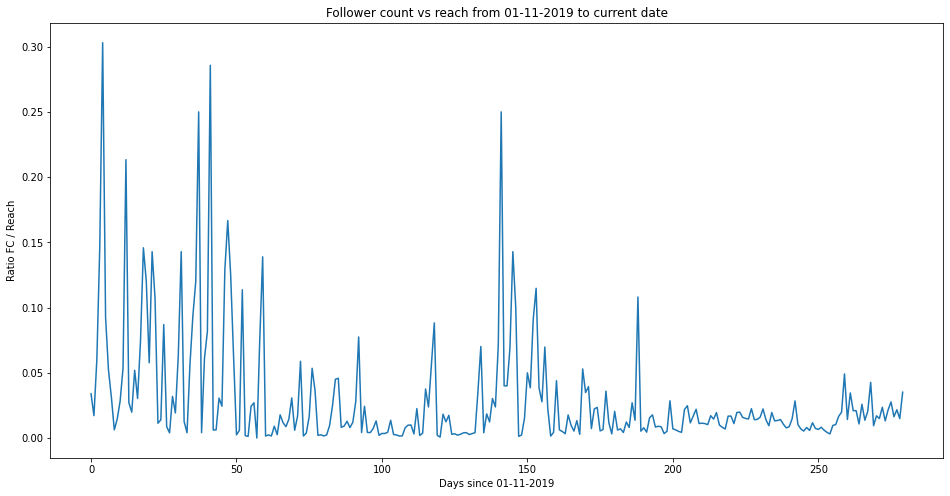

In [120]:
# I.e: What percentage of the reached people followed me.
reach_ratios = data['follower_count'] / data['reach']

fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.set_xlabel('Days since 01-11-2019')
ax.set_ylabel('Ratio FC / Reach')
ax.set_title('Follower count vs reach from 01-11-2019 to current date')
ax.plot([i for i in range(len(data.index))], reach_ratios)

### When were the highest ratios?

In [123]:
sorted_ratios = reach_ratios.sort_values(ascending = False)
sorted_ratios.head(n = 10)

date
2019-11-05    0.303030
2019-12-12    0.285714
2019-12-08    0.250000
2020-03-21    0.250000
2019-11-13    0.213333
2019-12-18    0.166667
2019-11-04    0.146199
2019-11-19    0.145833
2019-11-22    0.142857
2020-03-25    0.142857
dtype: float64

## Profile views analysis

### Profile views historic values

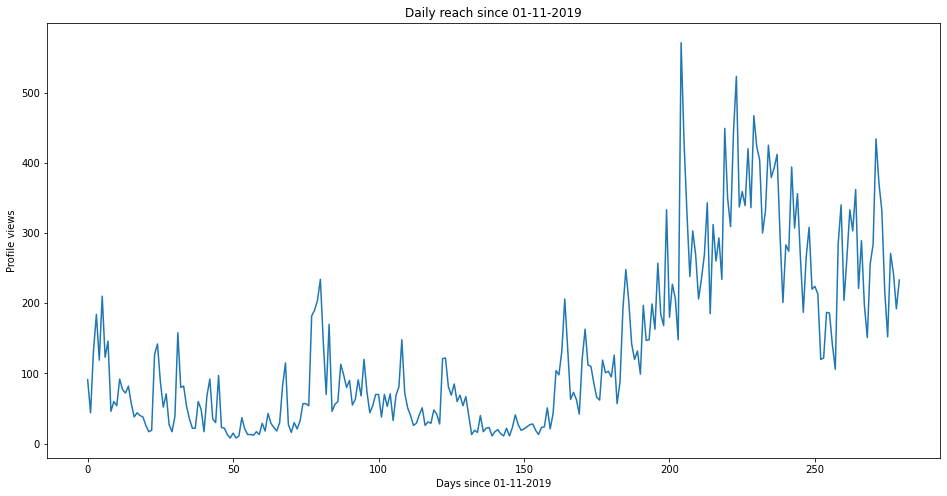

In [71]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.set_xlabel('Days since 01-11-2019')
ax.set_ylabel('Profile views')
ax.set_title('Daily reach since 01-11-2019')
ax.plot([i for i in range(len(data.index))], data['profile_views'])

### Follower increase and profile views

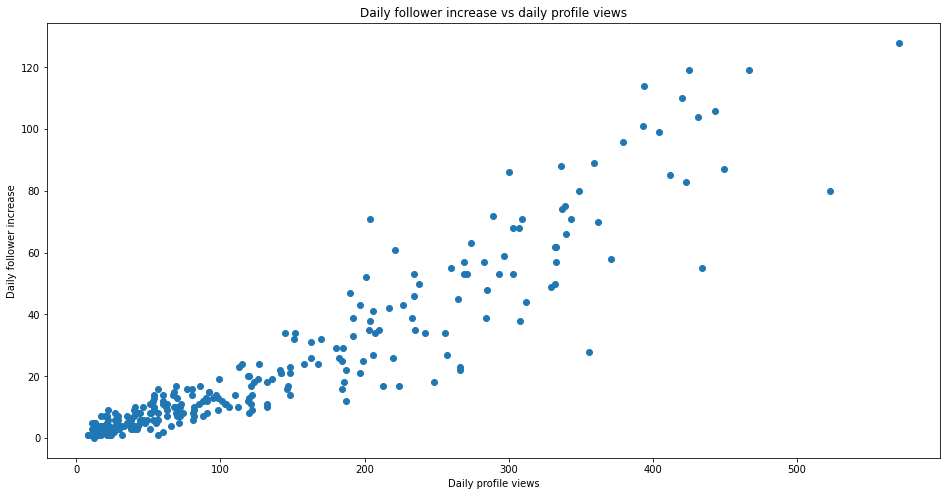

In [63]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.set_xlabel('Daily profile views')
ax.set_ylabel('Daily follower increase')
ax.set_title('Daily follower increase vs daily profile views')
ax.scatter(data['profile_views'], data['follower_count'])

### How many people that saw my profile, followed me?

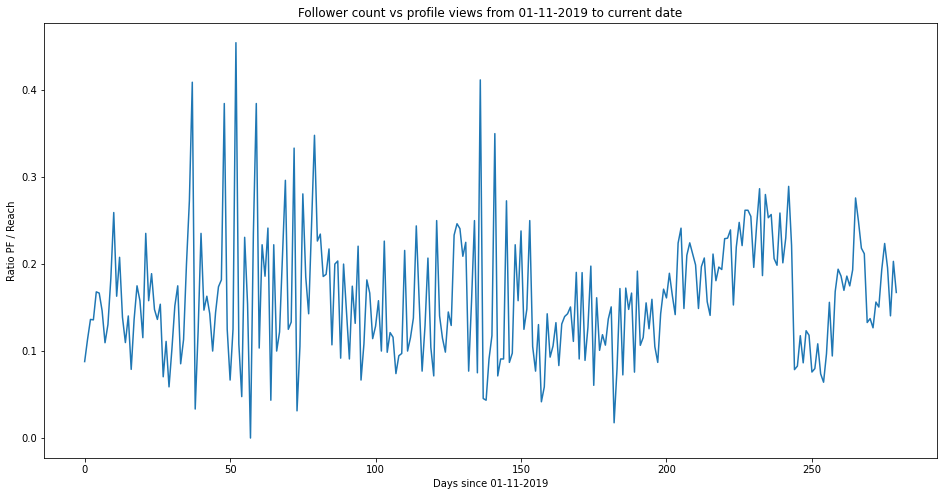

In [118]:
# I.e: What percentage of the people that saw my profile followed me.
profile_ratios = data['follower_count'] / data['profile_views']


fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.set_xlabel('Days since 01-11-2019')
ax.set_ylabel('Ratio PF / Reach')
ax.set_title('Follower count vs profile views from 01-11-2019 to current date')
ax.plot([i for i in range(len(data.index))], profile_ratios)

### When where the highest ratios?

In [119]:
sorted_ratios = profile_ratios.sort_values(ascending = False)
sorted_ratios.head(n = 10)

date
2019-12-23    0.454545
2020-03-16    0.411765
2019-12-08    0.409091
2019-12-19    0.384615
2019-12-30    0.384615
2020-03-21    0.350000
2020-01-19    0.348039
2020-01-12    0.333333
2020-01-09    0.296296
2020-06-30    0.289340
dtype: float64